In [181]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os
from pathlib import Path
import seaborn as sns

#default setting for charts
sns.set(font_scale=1.3)  # crazy big
plt.style.use('seaborn-whitegrid')

In [182]:
# S&P 500 Index

full_path = os.path.abspath(os.curdir)
stock_data_url = str(Path(full_path).parents[0])+"\datasets\Stock Data/"
sp500_aggregate_url = "S&P_500_aggregate_stock_data.csv"

sp500 = pd.read_csv(stock_data_url + sp500_aggregate_url, index_col= 'Date', 
                 infer_datetime_format = True, parse_dates = True)
sp500.head()

,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume
Date,,,,,,,,,,
2019-11-15,^GSPC,S&P 500,0.000000,0.000000,3120.459961,3120.459961,3120.459961,3104.600098,3107.919922,3335650000
2019-11-18,^GSPC,S&P 500,0.000503,0.000503,3122.030029,3122.030029,3124.169922,3112.060059,3117.909912,3436690000
2019-11-19,^GSPC,S&P 500,-0.000593,-0.000593,3120.179932,3120.179932,3127.639893,3113.469971,3127.449951,3590070000
2019-11-20,^GSPC,S&P 500,-0.003756,-0.003763,3108.459961,3108.459961,3118.969971,3091.409912,3114.659912,4034890000
2019-11-21,^GSPC,S&P 500,-0.001583,-0.001584,3103.540039,3103.540039,3110.110107,3094.550049,3108.489990,3720560000


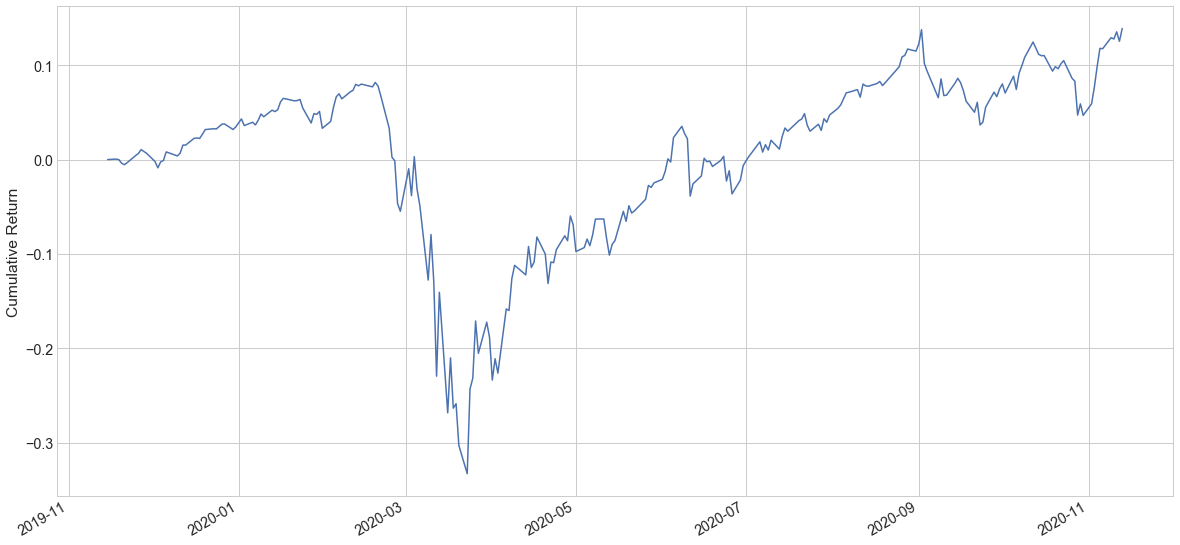

In [183]:
# Plot cumulative returns

fig = plt.figure()
ax1 = plt.axes()
(sp500['Log Return']).cumsum().plot(figsize=(20,10), title = '')
y_axis = ax1.axes.get_yaxis()
y_axis.set_label_text('Cumulative Return')
x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('')
plt.show()

#sector.groupby("Name")["CumulativeSum"].plot(figsize=(20,10), title = 'Cumulative Sector Returns', legend = True)

fig.savefig('sp_cum_returns.png')
#plt.close()

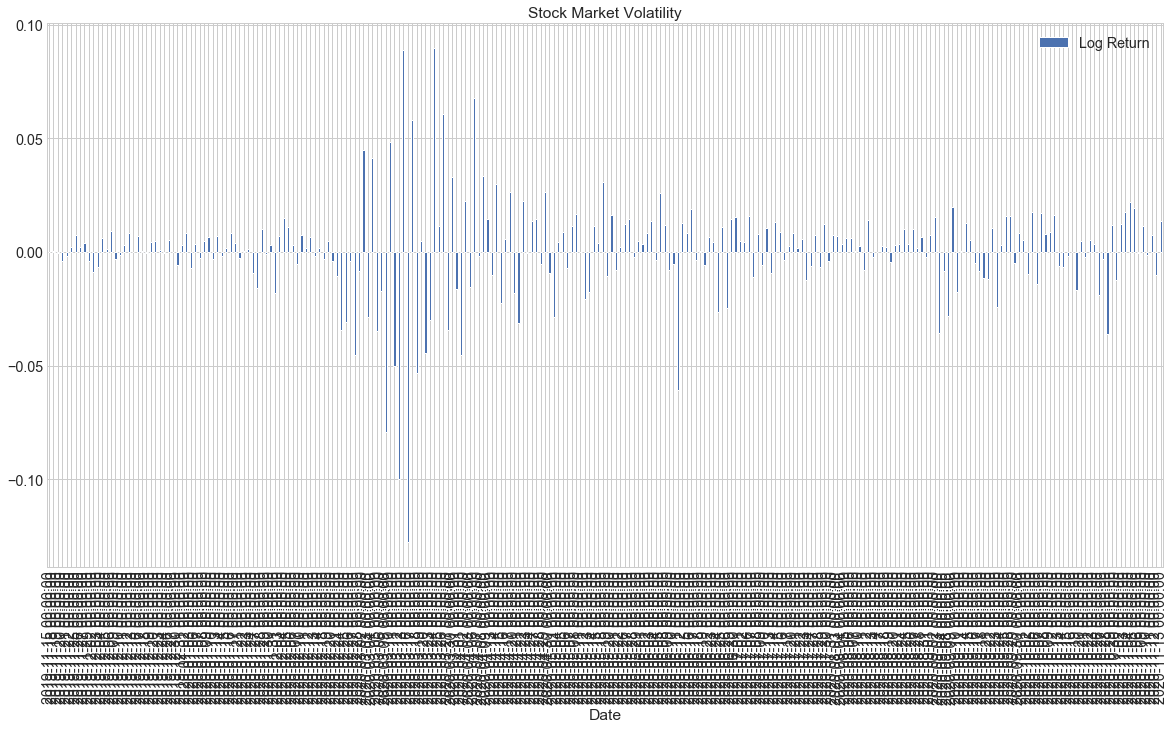

In [184]:
# Plot daily log returns
ax = sp500[['Log Return']].plot.bar(figsize=(20,10), title = 'Stock Market Volatility')
#ax = sp500[['Log Return']]['2020-04-17':'2020-05-01'].plot.bar(figsize=(20,10), title = 'Stock Market Valitility')
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188D67B7748>]],
      dtype=object)

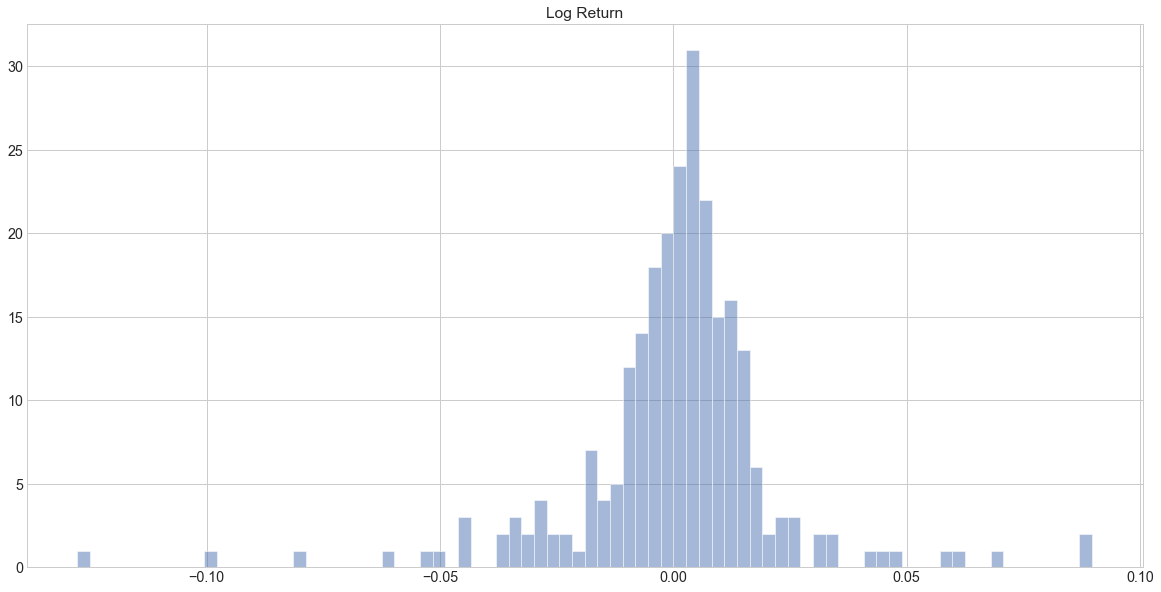

In [185]:
# Plot log returns probability
sp500[['Log Return']].hist(bins=80, alpha=0.5, figsize=(20,10), density=False)


                mean       std  annualized volatility
Date                                                 
2019-11-30  0.000655  0.003527               0.055989
2019-12-31  0.001342  0.004813               0.076405
2020-01-31 -0.000078  0.007505               0.119143
2020-02-29 -0.004624  0.015853               0.251656
2020-03-31 -0.006076  0.059332               0.941870
2020-04-30  0.005687  0.025795               0.409481
2020-05-31  0.002214  0.014441               0.229244
2020-06-30  0.000828  0.018775               0.298049
2020-07-31  0.002438  0.008365               0.132793
2020-08-31  0.003225  0.005096               0.080901
2020-09-30 -0.001906  0.015648               0.248407
2020-10-31 -0.001275  0.013217               0.209813
2020-11-30  0.009202  0.010221               0.162247


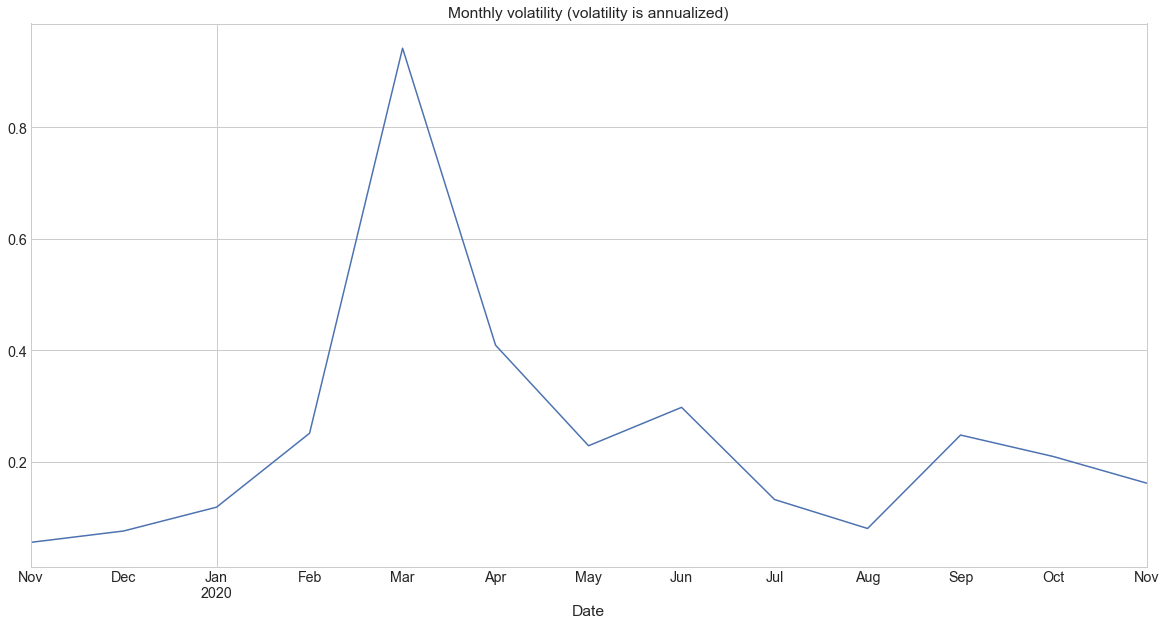

In [186]:
#Monthly Statistics
# Monthly volatility is calculated based on the average daily returns 
# in each month. Specifically, monthly volatility is the standard deviation 
# of the average of the daily log returns in a month. We then multiply our standard deviation 
# by the square root of 252 for annualizing (252 trading days). 
# Volatility indicates the fluctuation of prices around the mean; thus, 
# it is commonly used as a proxy for risk. 
#In addition, historical volatility 
# is computed as the standard deviation of the log return data. 
# For these reasons, we use monthly volatility to measure the risk of each industry during a month
#Industry volatility and economic uncertainty due to the COVID-19 pandemic: Evidence from wavelet coherence analysis
# See https://www.sciencedirect.com/science/article/pii/S154461232031597X

monthly_mean = sp500['Log Return'].resample('M').mean()
monthly_std = (sp500['Log Return'].resample('M').std())
annualized_std = (sp500['Log Return'].resample('M').std())*np.sqrt(252)

statistics = pd.concat([(monthly_mean), (monthly_std), (annualized_std)], 
                             axis = 'columns', join = 'inner')

names = ['mean', 'std', 'annualized volatility']

statistics.columns = names

print(statistics)
#statistics.plot.bar(figsize=(20,10), title = 'Mean and Standard Deviation for Each Month')
annualized_std.plot(figsize=(20,10), title = 'Monthly volatility (volatility is annualized)')


In [187]:
#Statistics for each period

# pre-crash 
pre_crash_mean = sp500['Log Return']['2019-11-15':'2020-02-18'].mean()
pre_crash_std = sp500['Log Return']['2019-11-15':'2020-02-18'].std()

print(pre_crash_mean, pre_crash_std)

crash_mean = sp500['Log Return']['2019-12-19':'2020-03-23'].mean()
crash_std = sp500['Log Return']['2019-12-19':'2020-03-23'].std()

print(crash_mean, crash_std)

post_crash_mean = sp500['Log Return']['2019-03-24':'2020-11-15'].mean()
post_crash_std = sp500['Log Return']['2019-03-24':'2020-11-15'].std()

print(post_crash_mean, post_crash_std)



0.001222514777777778 0.0059582808117571995
-0.0055478708124999995 0.03201612275773005
0.0005508726785714286 0.021829111150525837


In [188]:
# S&P largest gains
sp500.nlargest(10,['Log Return'])

,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume
Date,,,,,,,,,,
2020-03-24,^GSPC,S&P 500,0.093828,0.089683,2447.330078,2447.330078,2449.709961,2344.439941,2344.439941,7547350000
2020-03-13,^GSPC,S&P 500,0.092871,0.088808,2711.020020,2711.020020,2711.330078,2492.370117,2569.989990,8258670000
2020-04-06,^GSPC,S&P 500,0.070331,0.067968,2663.679932,2663.679932,2676.850098,2574.570068,2578.280029,6391860000
2020-03-26,^GSPC,S&P 500,0.062414,0.060544,2630.070068,2630.070068,2637.010010,2500.719971,2501.290039,7753160000
2020-03-17,^GSPC,S&P 500,0.059955,0.058226,2529.189941,2529.189941,2553.929932,2367.040039,2425.659912,8358500000
2020-03-10,^GSPC,S&P 500,0.049396,0.048215,2882.229980,2882.229980,2882.590088,2734.000000,2813.479980,7635960000
2020-03-02,^GSPC,S&P 500,0.046039,0.045011,3090.229980,3090.229980,3090.959961,2945.189941,2974.280029,6376400000
2020-03-04,^GSPC,S&P 500,0.042203,0.041336,3130.120117,3130.120117,3130.969971,3034.379883,3045.750000,5035480000
2020-04-08,^GSPC,S&P 500,0.034056,0.033489,2749.979980,2749.979980,2760.750000,2663.300049,2685.000000,5856370000


In [189]:
# S&P largest drops
sp500.nsmallest(10,['Log Return'])

,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume
Date,,,,,,,,,,
2020-03-16,^GSPC,S&P 500,-0.119841,-0.127652,2386.129883,2386.129883,2562.979980,2380.939941,2508.590088,7781540000
2020-03-12,^GSPC,S&P 500,-0.095113,-0.099945,2480.639893,2480.639893,2660.949951,2478.860107,2630.860107,8829380000
2020-03-09,^GSPC,S&P 500,-0.075970,-0.079010,2746.560059,2746.560059,2863.889893,2734.429932,2863.889893,8423050000
2020-06-11,^GSPC,S&P 500,-0.058944,-0.060753,3002.100098,3002.100098,3123.530029,2999.489990,3123.530029,7018890000
2020-03-18,^GSPC,S&P 500,-0.051831,-0.053222,2398.100098,2398.100098,2453.570068,2280.520020,2436.500000,8755780000
2020-03-11,^GSPC,S&P 500,-0.048868,-0.050103,2741.379883,2741.379883,2825.600098,2707.219971,2825.600098,7374110000
2020-02-27,^GSPC,S&P 500,-0.044163,-0.045168,2978.760010,2978.760010,3097.070068,2977.389893,3062.540039,7058840000
2020-04-01,^GSPC,S&P 500,-0.044142,-0.045146,2470.500000,2470.500000,2522.750000,2447.489990,2498.080078,5947900000
2020-03-20,^GSPC,S&P 500,-0.043360,-0.044328,2304.919922,2304.919922,2453.010010,2295.560059,2431.939941,9044690000


In [190]:
# Covid-19 Cases
covid_data_url = str(Path(full_path).parents[0])+"\datasets\John-Hopkins Covid Data/"
covid_us_url = "us-covid19-aggregate.csv"
covid_worldwide_url = "worldwide-covid19-aggregate.csv"

covid_us = pd.read_csv(covid_data_url + covid_us_url, index_col= 'Date', 
                 infer_datetime_format = True, parse_dates = True)

covid_worldwide = pd.read_csv(covid_data_url + covid_worldwide_url, index_col= 'Date', 
                 infer_datetime_format = True, parse_dates = True)

covid_us['Daily Cases'] = covid_us['Confirmed Cases']-covid_us['Confirmed Cases'].shift(1)

covid_us.head(10)

,Country,Confirmed Cases,Deaths,Cases Increase,Deaths Increase,Daily Cases
Date,,,,,,
2020-01-22,US,1,0,0.000000,0.0,NaN
2020-01-23,US,1,0,0.000000,0.0,0.0
2020-01-24,US,2,0,1.000000,0.0,1.0
2020-01-25,US,2,0,0.000000,0.0,0.0
2020-01-26,US,5,0,1.500000,0.0,3.0
2020-01-27,US,5,0,0.000000,0.0,0.0
2020-01-28,US,5,0,0.000000,0.0,0.0
2020-01-29,US,6,0,0.200000,0.0,1.0
2020-01-30,US,6,0,0.000000,0.0,0.0


In [191]:
covid_worldwide['Daily Cases'] = covid_worldwide['Confirmed Cases']-covid_worldwide['Confirmed Cases'].shift(1)

covid_worldwide.head()

,Confirmed Cases,Deaths,Cases Increase,Deaths Increase,Daily Cases
Date,,,,,
2020-01-22,555,17,0.000000,0.000000,NaN
2020-01-23,654,18,0.178378,0.058824,99.0
2020-01-24,941,26,0.438838,0.444444,287.0
2020-01-25,1434,42,0.523911,0.615385,493.0
2020-01-26,2118,56,0.476987,0.333333,684.0


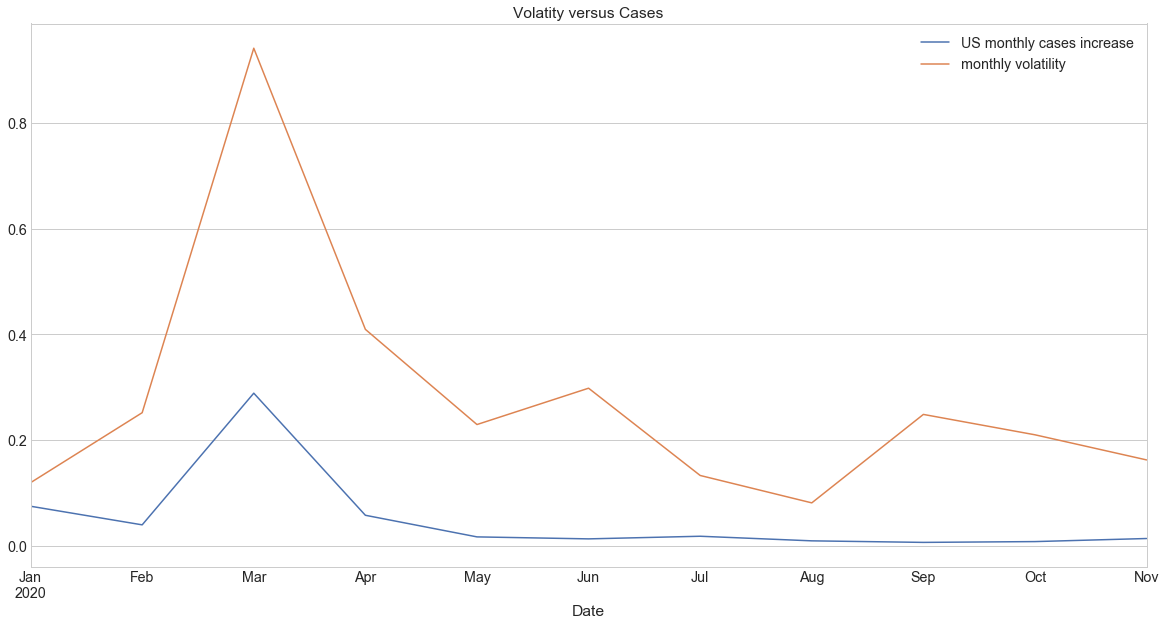

In [192]:
#Plot cases and volatility

covid_us_new = covid_us

#daily rate (infection rate would be t-14)
# CASES=LOG CONFIRMED CASES+1,
# INFECTION RATE= [CASES(T)-CASES(T-14)]
covid_us_new['Log Daily Cases Increase'] = np.log(covid_us_new['Confirmed Cases']/covid_us_new['Confirmed Cases'].shift(1))
#covid_us_new['Log Daily Cases Increase'] = np.log((1+covid_us_new['Confirmed Cases'])/(1+covid_us_new['Confirmed Cases'].shift(14)))
#covid_us_new['Log Daily Cases Increase'] = np.log((1+covid_us_new['Confirmed Cases'])/(1+covid_us_new['Confirmed Cases'].shift(1)))

monthly_mean_cases_increase = covid_us_new['Log Daily Cases Increase'].resample('M').mean()

monthly_mean_cases_increase ['2020-01-31'] = (monthly_mean_cases_increase ['2020-01-31']*10)/31

#print(monthly_mean_cases_increase)


volatility = pd.concat([(monthly_mean_cases_increase),(annualized_std)], 
                             axis = 'columns', join = 'inner')

names = ['US monthly cases increase', 'monthly volatility']

volatility.columns = names

volatility.plot(figsize=(20,10), title = 'Volatity versus Cases')

#covid_us_new.head(20)

In [193]:
# Combining datasets
combined_data = pd.concat([(sp500), (covid_us)], 
                             axis = 'columns', join = 'inner')

#combined_data = pd.concat([(sp500), (covid_worldwide)], 
                             #axis = 'columns', join = 'inner')

combined_data.head()

,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume,Country,Confirmed Cases,Deaths,Cases Increase,Deaths Increase,Daily Cases,Log Daily Cases Increase
Date,,,,,,,,,,,,,,,,,
2020-01-22,^GSPC,S&P 500,0.000289,0.000289,3321.750000,3321.750000,3337.770020,3320.040039,3330.020020,3619850000,US,1,0,0.0,0.0,NaN,NaN
2020-01-23,^GSPC,S&P 500,0.001141,0.001140,3325.540039,3325.540039,3326.879883,3301.870117,3315.770020,3764860000,US,1,0,0.0,0.0,0.0,0.000000
2020-01-24,^GSPC,S&P 500,-0.009042,-0.009083,3295.469971,3295.469971,3333.179932,3281.530029,3333.100098,3707130000,US,2,0,1.0,0.0,1.0,0.693147
2020-01-27,^GSPC,S&P 500,-0.015731,-0.015856,3243.629883,3243.629883,3258.850098,3234.500000,3247.159912,3823100000,US,5,0,0.0,0.0,0.0,0.000000
2020-01-28,^GSPC,S&P 500,0.010054,0.010003,3276.239990,3276.239990,3285.780029,3253.219971,3255.350098,3526720000,US,5,0,0.0,0.0,0.0,0.000000


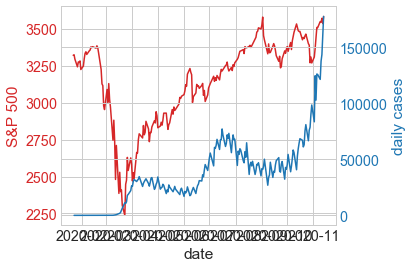

In [194]:
# # Plot close and daily cases
# combined_data[['Close', 'Daily Cases']].plot(figsize=(20,10), title = 'S&P 500 Index vs Cases')

data1 = combined_data[['Close']]
data2 = combined_data[['Daily Cases']]

# data1 = combined_data[['Log Return']]
# data2 = combined_data[['Cases Increase']]

#data1=data1['2020-01-22':'2020-05-01']
#data2=data2['2020-01-22':'2020-05-01']

# data1=data1['2019-12-19':'2020-03-23']
# data2=data2['2019-12-19':'2020-03-23']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('S&P 500', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('daily cases', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




In [195]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from scipy.stats import pearsonr

combined_data.dropna(inplace = True)
# prepare data
data1 = combined_data['Log Daily Cases Increase'].to_numpy()
data2 = combined_data['Log Return'].to_numpy()
# calculate Pearson's correlation
corr,p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % p)

Pearsons correlation: -0.109
p-value: 0.119


In [196]:
# Oxford Indexes

gov_url = Path(r'C:\Users\ndarv\Big_Data_Project_Fall_2020\oxford_daily_changes.csv')

In [197]:

gov = pd.read_csv(gov_url, index_col= 'Date', 
                 infer_datetime_format = True, parse_dates = True)

gov.head()

,CountryName,CountryCode,ConfirmedCases,StringencyIndexForDisplay,StringencyIndexForDisplay_LogChange,StringencyLegacyIndexForDisplay,StringencyLegacyIndexForDisplay_PercentChange,StringencyLegacyIndexForDisplay_LogChange,GovernmentResponseIndexForDisplay,GovernmentResponseIndexForDisplay_LogChange,ContainmentHealthIndexForDisplay,ContainmentHealthIndexForDisplay_LogChange,EconomicSupportIndexForDisplay,EconomicSupportIndexForDisplay_LogChange
Date,,,,,,,,,,,,,,
2020-01-01,United States,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,United States,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,United States,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,United States,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,United States,USA,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
gov = gov.drop(['CountryName','CountryCode'] , axis=1 )

#gov = gov['2020-01-22':'2020-04-25']

gov.head()
gov.describe()

,ConfirmedCases,StringencyIndexForDisplay,StringencyIndexForDisplay_LogChange,StringencyLegacyIndexForDisplay,StringencyLegacyIndexForDisplay_PercentChange,StringencyLegacyIndexForDisplay_LogChange,GovernmentResponseIndexForDisplay,GovernmentResponseIndexForDisplay_LogChange,ContainmentHealthIndexForDisplay,ContainmentHealthIndexForDisplay_LogChange,EconomicSupportIndexForDisplay,EconomicSupportIndexForDisplay_LogChange
count,3.300000e+02,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,3.381960e+06,54.395212,0.013142,55.579909,0.008687,0.013198,54.716636,0.013099,56.135273,0.013178,46.212121,0.012579
std,3.449430e+06,26.684640,0.114086,26.526409,0.062761,0.124391,26.028136,0.095357,26.129525,0.101480,27.476995,0.228507
min,0.000000e+00,0.000000,-0.070378,0.000000,-0.049487,-0.050042,0.000000,-0.043472,0.000000,-0.050007,0.000000,0.000000
25%,3.801500e+04,62.500000,0.000000,66.670000,0.000000,0.000000,58.330000,0.000000,66.670000,0.000000,0.000000,0.000000
50%,2.061756e+06,67.130000,0.000000,68.570000,0.000000,0.000000,68.450000,0.000000,69.440000,0.000000,62.500000,0.000000
75%,6.141593e+06,72.690000,0.000000,72.140000,0.000000,0.000000,70.240000,0.000000,71.530000,0.000000,62.500000,0.000000
max,1.259116e+07,75.460000,1.880991,76.900000,0.691860,2.096790,74.400000,1.519513,76.390000,1.642873,62.500000,4.151040


In [199]:
# Combining datasets
combined_data2 = pd.concat([(gov), (covid_us)], 
                             axis = 'columns', join = 'inner')

combined_data2.head()


,ConfirmedCases,StringencyIndexForDisplay,StringencyIndexForDisplay_LogChange,StringencyLegacyIndexForDisplay,StringencyLegacyIndexForDisplay_PercentChange,StringencyLegacyIndexForDisplay_LogChange,GovernmentResponseIndexForDisplay,GovernmentResponseIndexForDisplay_LogChange,ContainmentHealthIndexForDisplay,ContainmentHealthIndexForDisplay_LogChange,EconomicSupportIndexForDisplay,EconomicSupportIndexForDisplay_LogChange,Country,Confirmed Cases,Deaths,Cases Increase,Deaths Increase,Daily Cases,Log Daily Cases Increase
Date,,,,,,,,,,,,,,,,,,,
2020-01-22,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,0.0,0.0,US,1,0,0.0,0.0,NaN,NaN
2020-01-23,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,0.0,0.0,US,1,0,0.0,0.0,0.0,0.000000
2020-01-24,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,0.0,0.0,US,2,0,1.0,0.0,1.0,0.693147
2020-01-25,2,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,0.0,0.0,US,2,0,0.0,0.0,0.0,0.000000
2020-01-26,2,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,0.0,0.0,US,5,0,1.5,0.0,3.0,0.916291


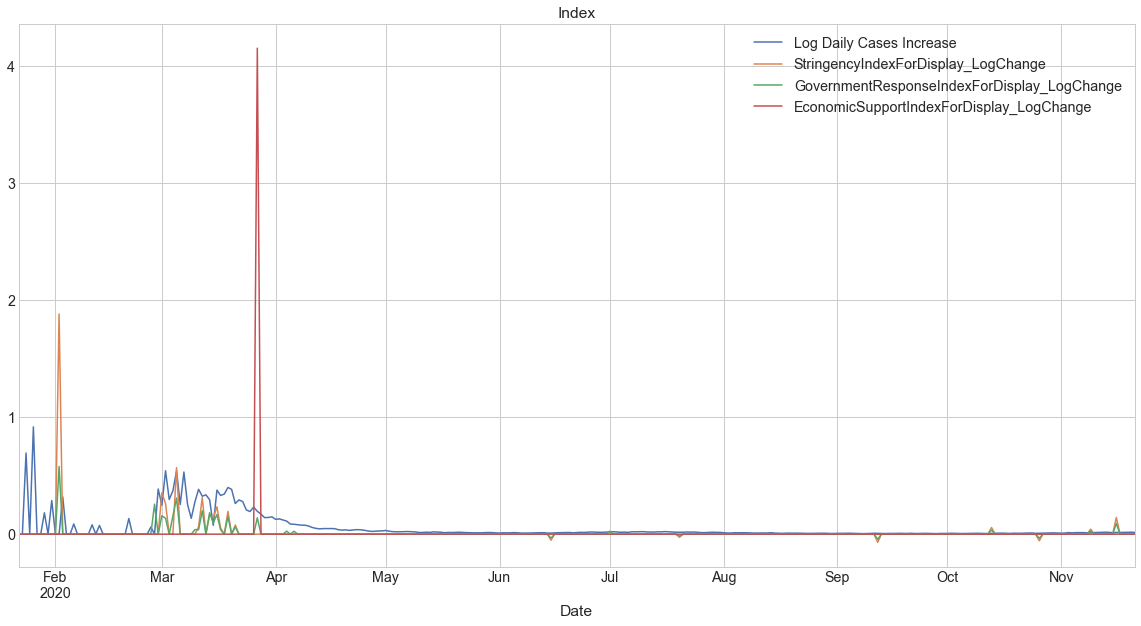

In [200]:

combined_data2[['Log Daily Cases Increase','StringencyIndexForDisplay_LogChange','GovernmentResponseIndexForDisplay_LogChange', 'EconomicSupportIndexForDisplay_LogChange']].plot(figsize=(20,10), title = 'Index')

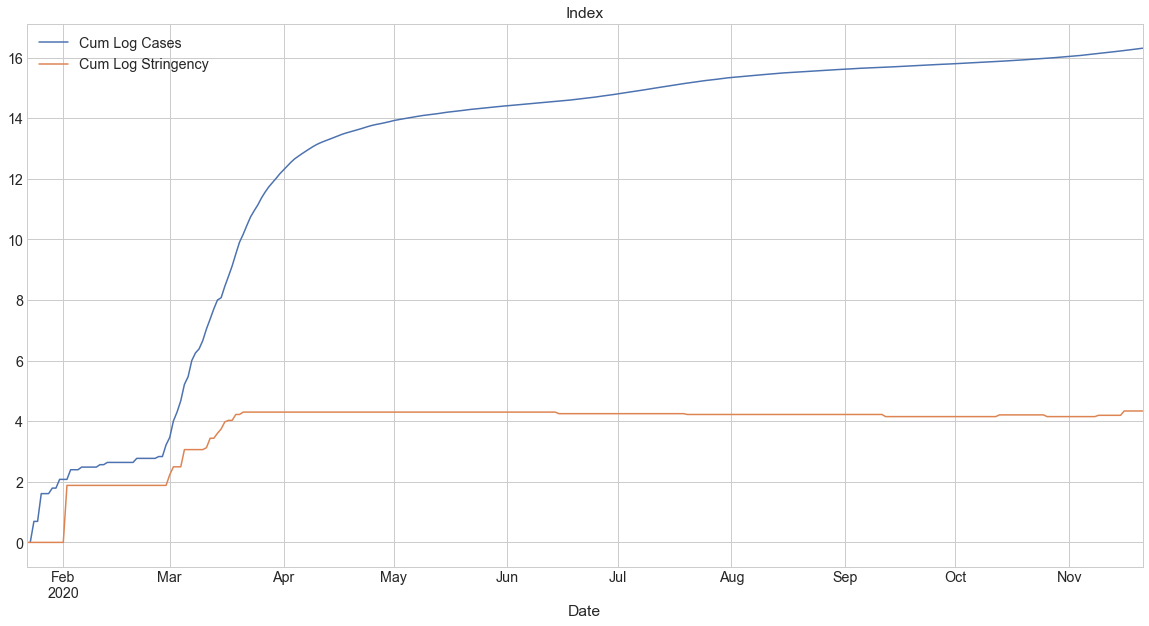

In [201]:
combined_data2['Cum Log Cases'] = combined_data2['Log Daily Cases Increase'].cumsum()
combined_data2['Cum Log Stringency'] = combined_data2['StringencyIndexForDisplay_LogChange'].cumsum()
combined_data2[['Cum Log Cases','Cum Log Stringency']].plot(figsize=(20,10), title = 'Index')

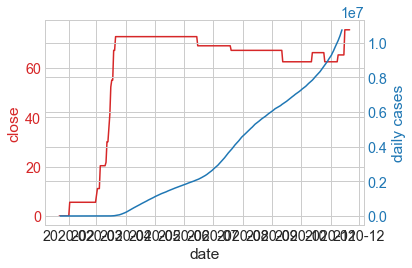

In [202]:
# # Plot stringency and cases


data1 = combined_data2[['StringencyIndexForDisplay']]
data2 = combined_data[['Confirmed Cases']]

# data1 = combined_data[['Log Return']]
# data2 = combined_data[['Cases Increase']]

# data1=data1['2020-01-22':'2020-04-25']
# data2=data2['2020-01-22':'2020-04-25']

# data1=data1['2019-12-19':'2020-03-23']
# data2=data2['2019-12-19':'2020-03-23']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('close', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('daily cases', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [203]:
combined_data2 = pd.concat([(combined_data2), (sp500)], 
                             axis = 'columns', join = 'inner')

combined_data2.head()

,ConfirmedCases,StringencyIndexForDisplay,StringencyIndexForDisplay_LogChange,StringencyLegacyIndexForDisplay,StringencyLegacyIndexForDisplay_PercentChange,StringencyLegacyIndexForDisplay_LogChange,GovernmentResponseIndexForDisplay,GovernmentResponseIndexForDisplay_LogChange,ContainmentHealthIndexForDisplay,ContainmentHealthIndexForDisplay_LogChange,...,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,...,^GSPC,S&P 500,0.000289,0.000289,3321.750000,3321.750000,3337.770020,3320.040039,3330.020020,3619850000
2020-01-23,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,...,^GSPC,S&P 500,0.001141,0.001140,3325.540039,3325.540039,3326.879883,3301.870117,3315.770020,3764860000
2020-01-24,1,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,...,^GSPC,S&P 500,-0.009042,-0.009083,3295.469971,3295.469971,3333.179932,3281.530029,3333.100098,3707130000
2020-01-27,5,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,...,^GSPC,S&P 500,-0.015731,-0.015856,3243.629883,3243.629883,3258.850098,3234.500000,3247.159912,3823100000
2020-01-28,5,0.0,0.0,0.0,0.0,0.0,3.57,0.0,4.17,0.0,...,^GSPC,S&P 500,0.010054,0.010003,3276.239990,3276.239990,3285.780029,3253.219971,3255.350098,3526720000


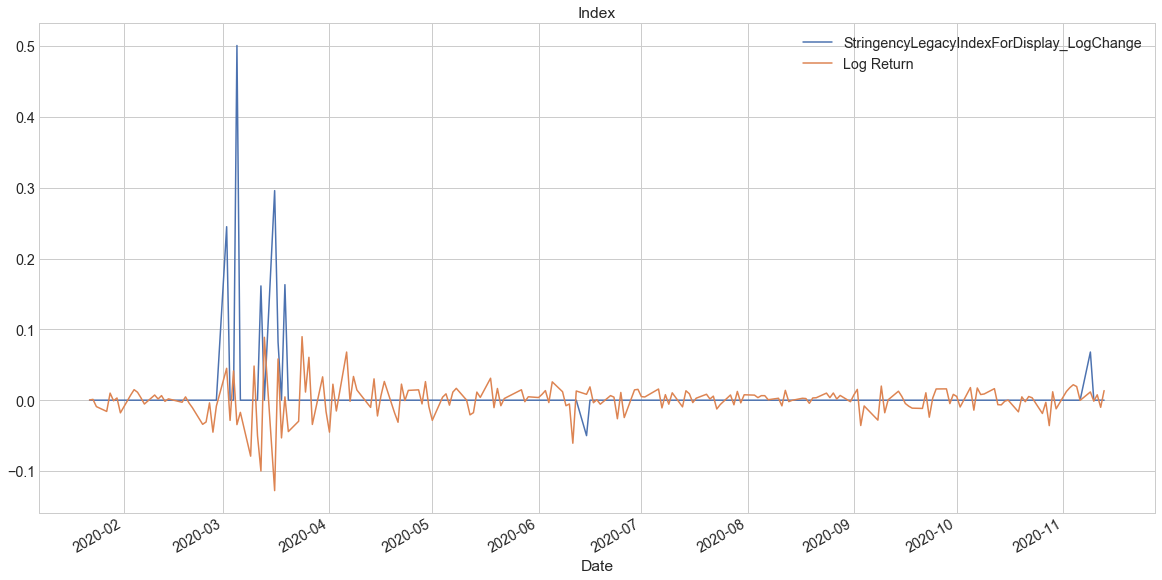

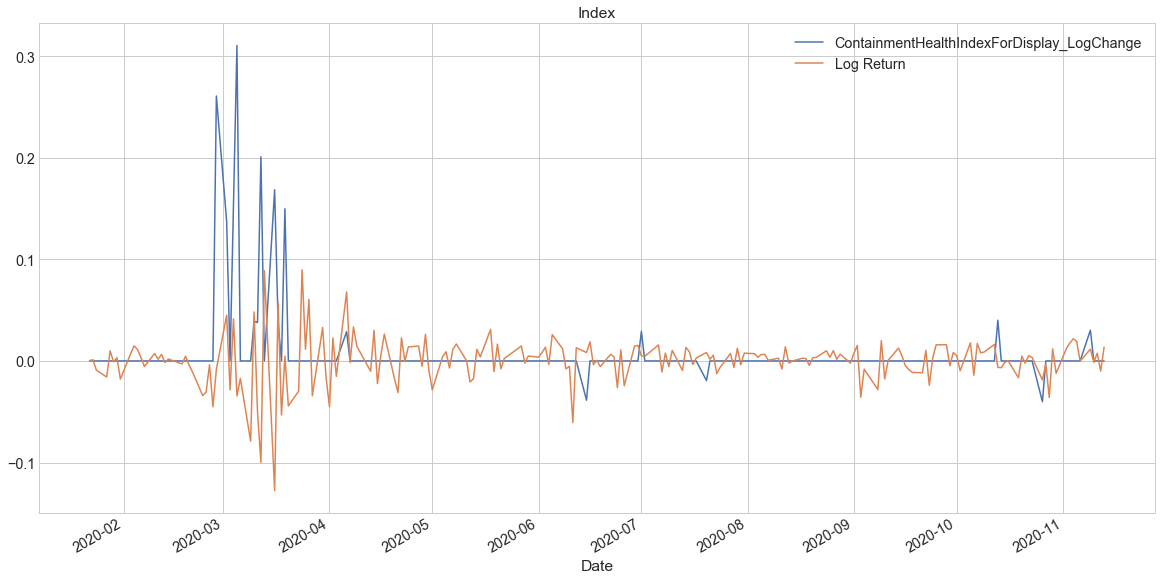

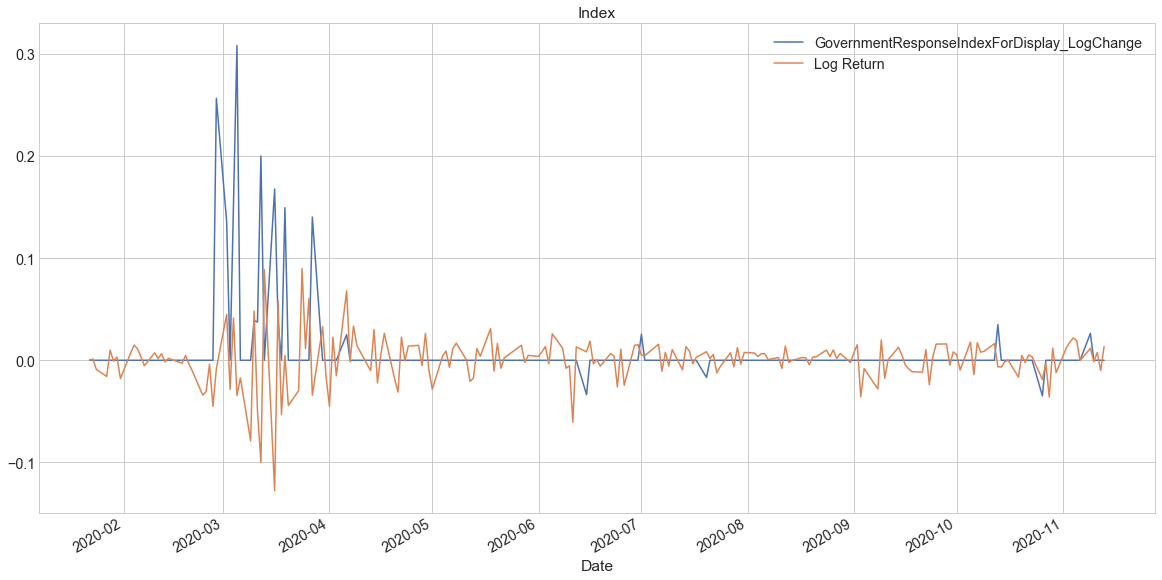

In [204]:
combined_data2[['StringencyLegacyIndexForDisplay_LogChange','Log Return']].plot(figsize=(20,10), title = 'Index')
combined_data2[['ContainmentHealthIndexForDisplay_LogChange','Log Return']].plot(figsize=(20,10), title = 'Index')
combined_data2[['GovernmentResponseIndexForDisplay_LogChange','Log Return']].plot(figsize=(20,10), title = 'Index')
#combined_data2[['EconomicSupportIndexForDisplay_LogChange','Log Return']].plot(figsize=(20,10), title = 'Index')


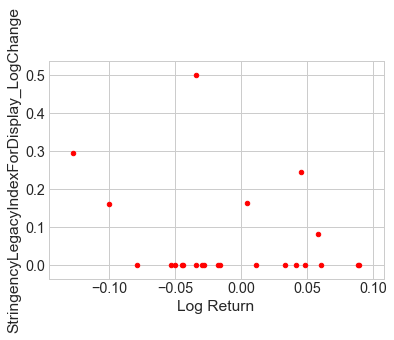

In [205]:
combined_data2['2020-03-01':'2020-04-01'].plot.scatter(x='Log Return',y='StringencyLegacyIndexForDisplay_LogChange', c='red')

In [206]:
# Correlation
correlation = combined_data2[['StringencyLegacyIndexForDisplay_LogChange','Log Return']]['2020-03-01':'2020-04-01'].corr()
correlation

,StringencyLegacyIndexForDisplay_LogChange,Log Return
StringencyLegacyIndexForDisplay_LogChange,1.000000,-0.260847
Log Return,-0.260847,1.000000


In [207]:
# The two most commonly used statistical tests for establishing relationship between variables 
# are correlation and p-value. Correlation is a way to test if two variables 
# have any kind of relationship, whereas p-value tells us if the result of 
# an experiment is statistically significant.

# A low p-value (such as 0.01) is taken as evidence that the null hypothesis can be
# ‘rejected’. Statisticians say that a p-value of 0.01 is ‘highly significant’ or say that ‘the
# data is significant at the 0.01 level’
# A competent researcher investigating a hypothesized relationship will set a p-value
# in advance of the empirical study. Typically, values of either 0.01 or 0.05 are used. If
# the data from the study results in a p-value of less than that specified in advance, the
# researcher will claim that their study is significant and it enables them to reject the
# null hypothesis and conclude that a relationship really exists.


# calculate the Pearson's correlation between two variables
from numpy.random import randn
from scipy.stats import pearsonr

# prepare data
data1 = combined_data2['StringencyLegacyIndexForDisplay_LogChange'].to_numpy()
data2 = combined_data2['Log Return'].to_numpy()
# calculate Pearson's correlation
corr,p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value: %.3f' % p)



Pearsons correlation: -0.236
p-value: 0.001
